(739, 108, 3)
texto:41 falO] c|



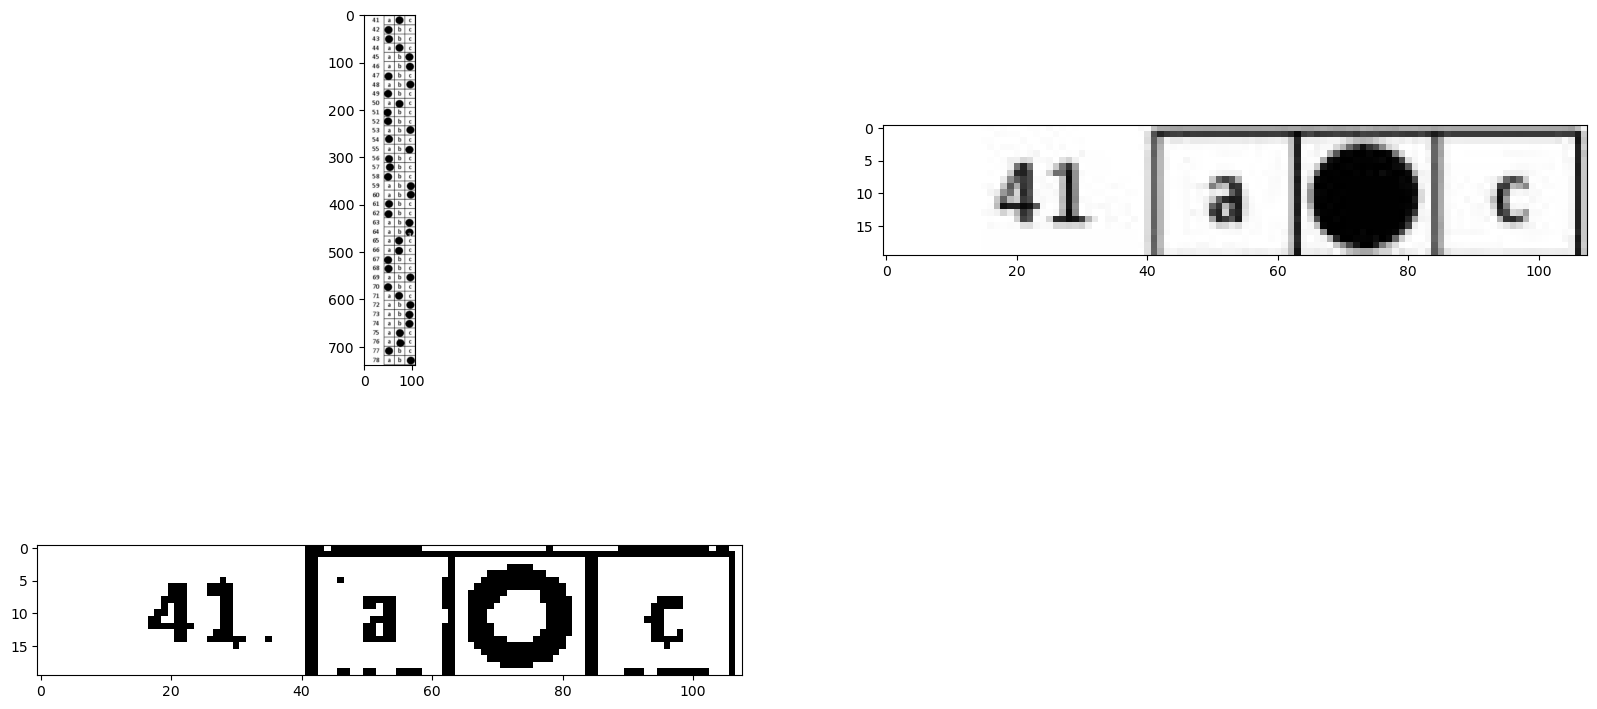

In [135]:
import cv2
import numpy as np
import skimage as sk
import matplotlib.pylab as plt
import pytesseract 
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

imagen=cv2.imread('../test/test2.jpg')
img_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
_,bin=cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)
contorno=sk.measure.label(bin,connectivity=2)
propiedades = sk.measure.regionprops(contorno)
secciones=[]
for prop in propiedades:
    if prop.area >1000:  
        y0, x0, y1, x1 = prop.bbox
        #cv2.rectangle(imagen, (x0, y0), (x1, y1), (0, 255, 0), 2)
        imagen_cortada=imagen[y0:y1,x0-40:x1]
        secciones.append(imagen_cortada)


print(secciones[1].shape)
imagen_subCortada=secciones[1][0:int(secciones[1].shape[0]/36),0:secciones[1].shape[1]]
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.imshow(secciones[1])

plt.subplot(222)
plt.imshow(imagen_subCortada)

img_gray_sub=cv2.cvtColor(imagen_subCortada,cv2.COLOR_BGR2GRAY)
#_,img_thresholded = cv2.threshold(img_gray_sub, 195, 255, cv2.THRESH_BINARY )

img_thresholded=cv2.adaptiveThreshold(img_gray_sub,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,5)

plt.subplot(223)
plt.imshow(img_thresholded,cmap='gray')

custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(img_thresholded, config=custom_config)


print(f"texto:{text}")
